In [1]:
import numpy as np
import matplotlib.pyplot as plt

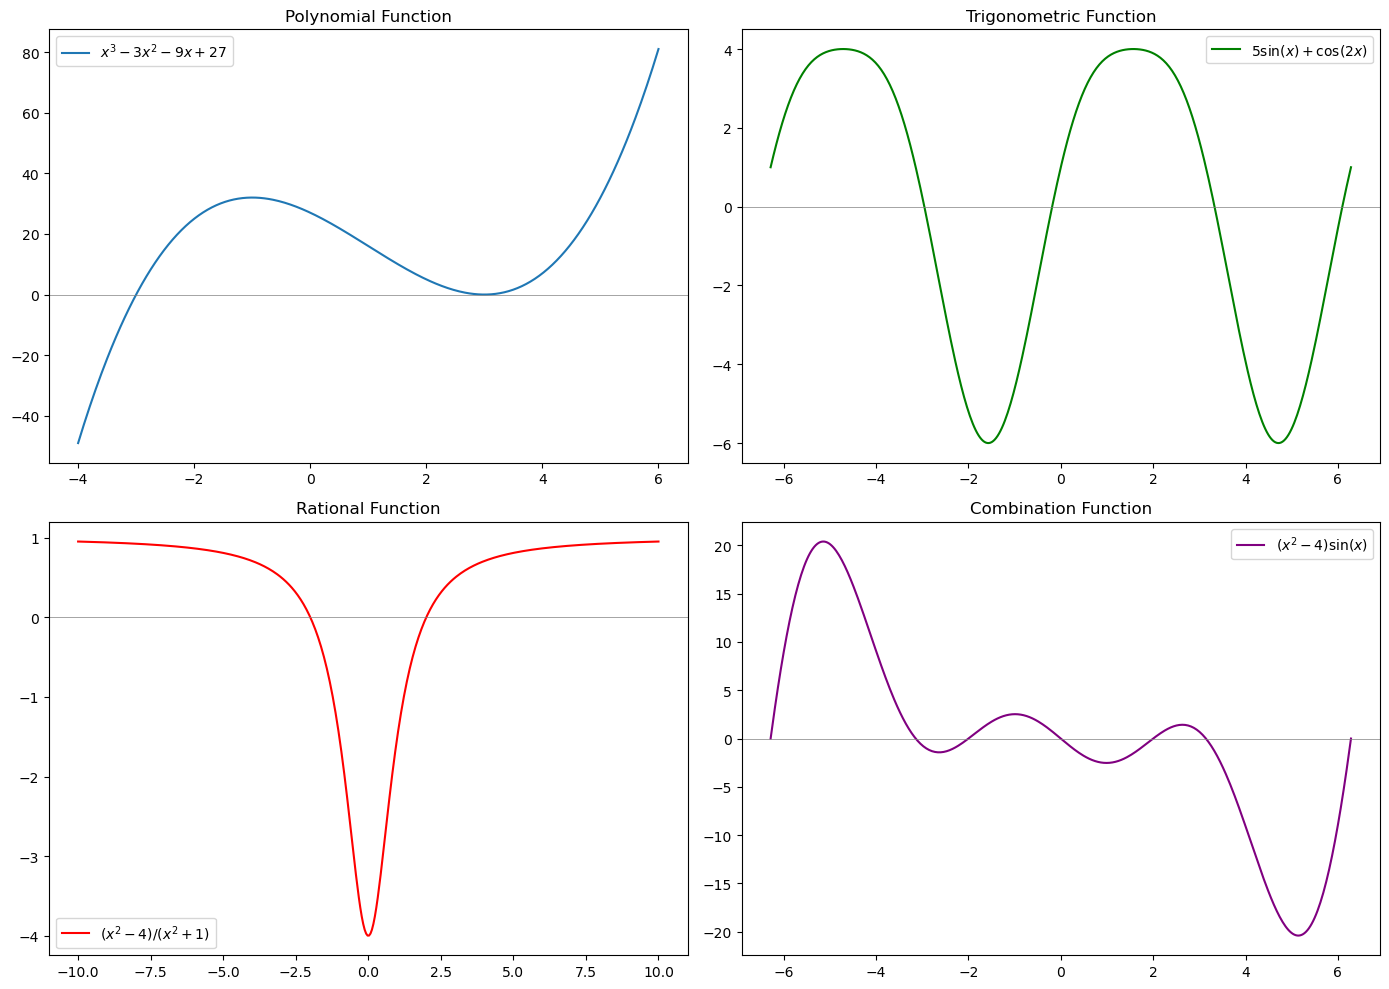

In [2]:
x_polynomial = np.linspace(-4, 6, 400)
x_trigonometric = np.linspace(-2*np.pi, 2*np.pi, 400)
x_rational = np.linspace(-10, 10, 400)
x_combination = np.linspace(-2*np.pi, 2*np.pi, 400)

def f(x):
    return x**3 - 3*x**2 - 9*x + 27

def g(x):
    return 5*np.sin(x) + np.cos(2*x)

def h(x):
    return (x**2 - 4)/(x**2 + 1)

def k(x):
    return (x**2 - 4) * np.sin(x)

y_polynomial = f(x_polynomial)
y_trigonometric = g(x_trigonometric)
y_rational = h(x_rational)
y_combination = k(x_combination)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].plot(x_polynomial, y_polynomial, label='$x^3 - 3x^2 - 9x + 27$')
axs[0, 0].axhline(0, color='gray', lw=0.5)
axs[0, 0].set_title('Polynomial Function')
axs[0, 0].legend()

axs[0, 1].plot(x_trigonometric, y_trigonometric, label='$5\sin(x) + \cos(2x)$', color='green')
axs[0, 1].axhline(0, color='gray', lw=0.5)
axs[0, 1].set_title('Trigonometric Function')
axs[0, 1].legend()

axs[1, 0].plot(x_rational, y_rational, label='$(x^2 - 4)/(x^2 + 1)$', color='red')
axs[1, 0].axhline(0, color='gray', lw=0.5)
axs[1, 0].set_title('Rational Function')
axs[1, 0].legend()

axs[1, 1].plot(x_combination, y_combination, label='$(x^2 - 4)\sin(x)$', color='purple')
axs[1, 1].axhline(0, color='gray', lw=0.5)
axs[1, 1].set_title('Combination Function')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


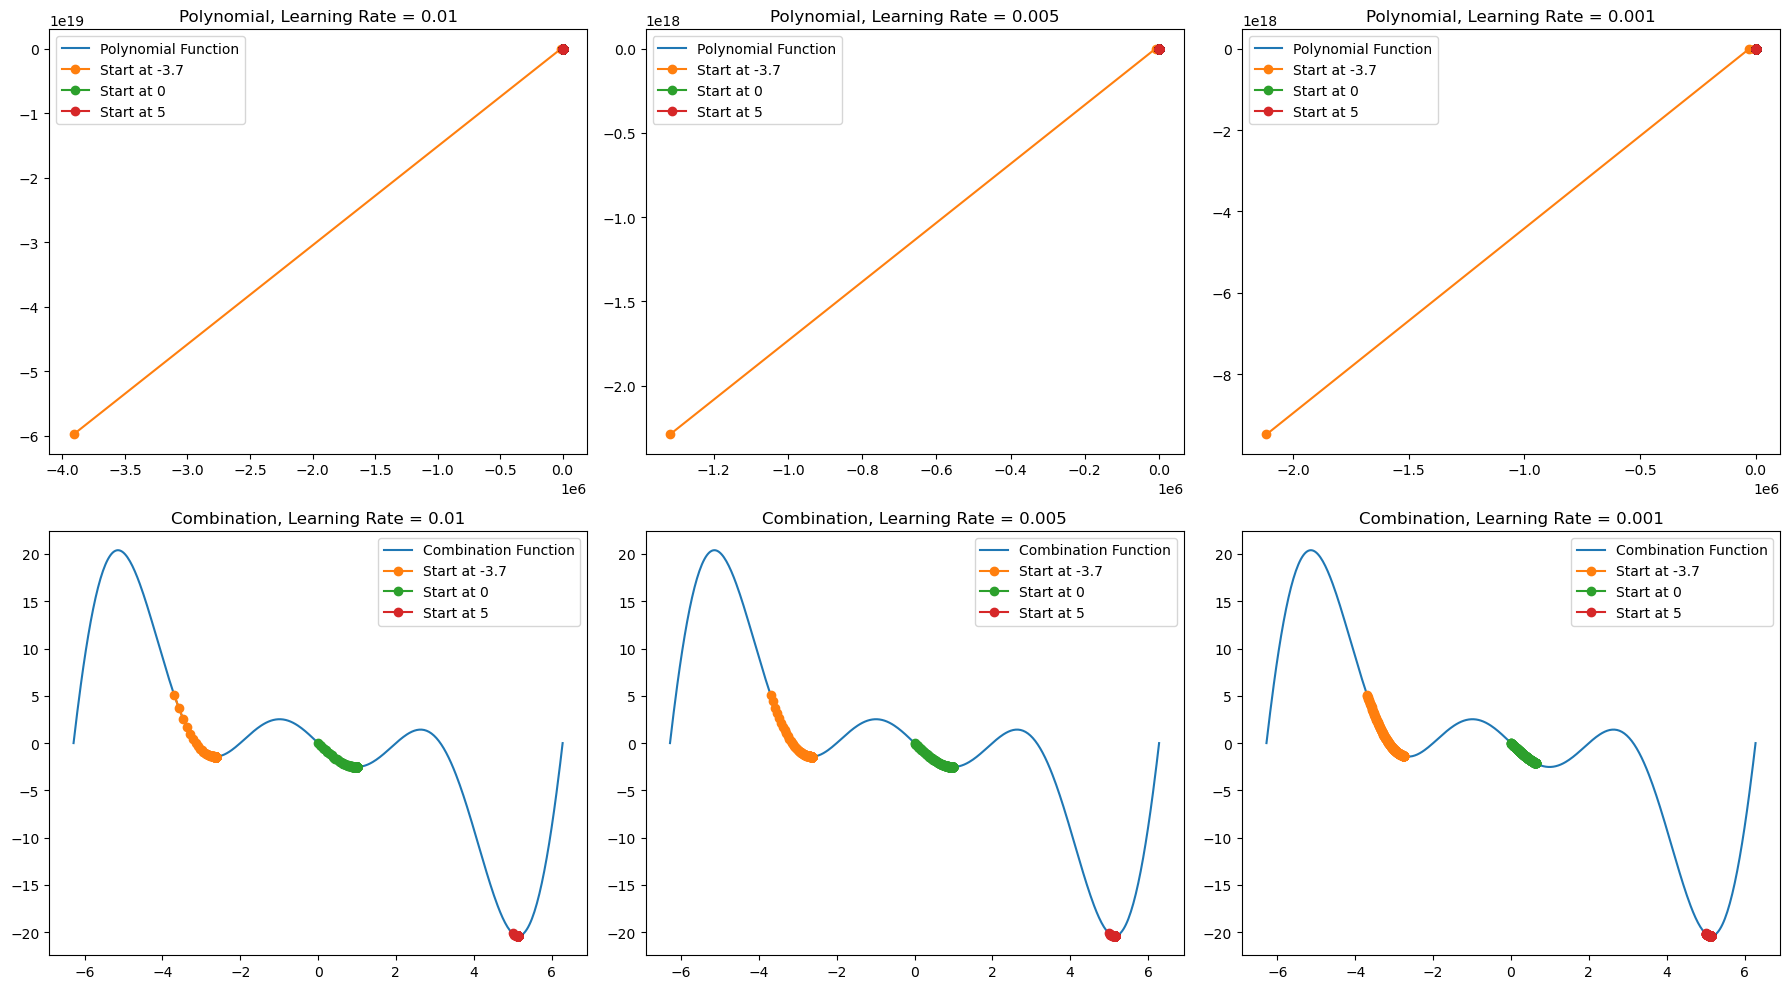

In [7]:
initial_points = [-3.7, 0, 5]
learning_rates = [0.01, 0.005, 0.001]
iterations = 200

def derivative_polynomial(x):
    return 3*x**2 - 6*x - 9

def derivative_combination(x):
    return 2*x*np.sin(x) + (x**2 - 4)*np.cos(x)

def gradient_descent(derivative_func, initial_x, learning_rate, n_iterations, threshold=1e10):
    x_path = [initial_x]
    for _ in range(n_iterations):
        current_x = x_path[-1]
        gradient = derivative_func(current_x)
        if abs(gradient) > threshold:
            break
        next_x = current_x - learning_rate * gradient
        if abs(next_x) > threshold:  # Stop if x becomes too large
            break
        x_path.append(next_x)
    return x_path


paths_polynomial = {gamma: {x0: gradient_descent(derivative_polynomial, x0, gamma, iterations)
                            for x0 in initial_points} for gamma in learning_rates}
paths_combination = {gamma: {x0: gradient_descent(derivative_combination, x0, gamma, iterations)
                             for x0 in initial_points} for gamma in learning_rates}

fig, axs = plt.subplots(2, len(learning_rates), figsize=(18, 10))

for i, gamma in enumerate(learning_rates):
    axs[0, i].plot(x_polynomial, y_polynomial, label=f'Polynomial Function')
    for x0 in initial_points:
        path = paths_polynomial[gamma][x0]
        axs[0, i].plot(path, f(np.array(path)), marker='o', label=f'Start at {x0}')
    axs[0, i].set_title(f'Polynomial, Learning Rate = {gamma}')
    axs[0, i].legend()
    
    axs[1, i].plot(x_combination, y_combination, label='Combination Function')
    for x0 in initial_points:
        path = paths_combination[gamma][x0]
        axs[1, i].plot(path, k(np.array(path)), marker='o', label=f'Start at {x0}')
    axs[1, i].set_title(f'Combination, Learning Rate = {gamma}')
    axs[1, i].legend()

plt.tight_layout()
plt.show()


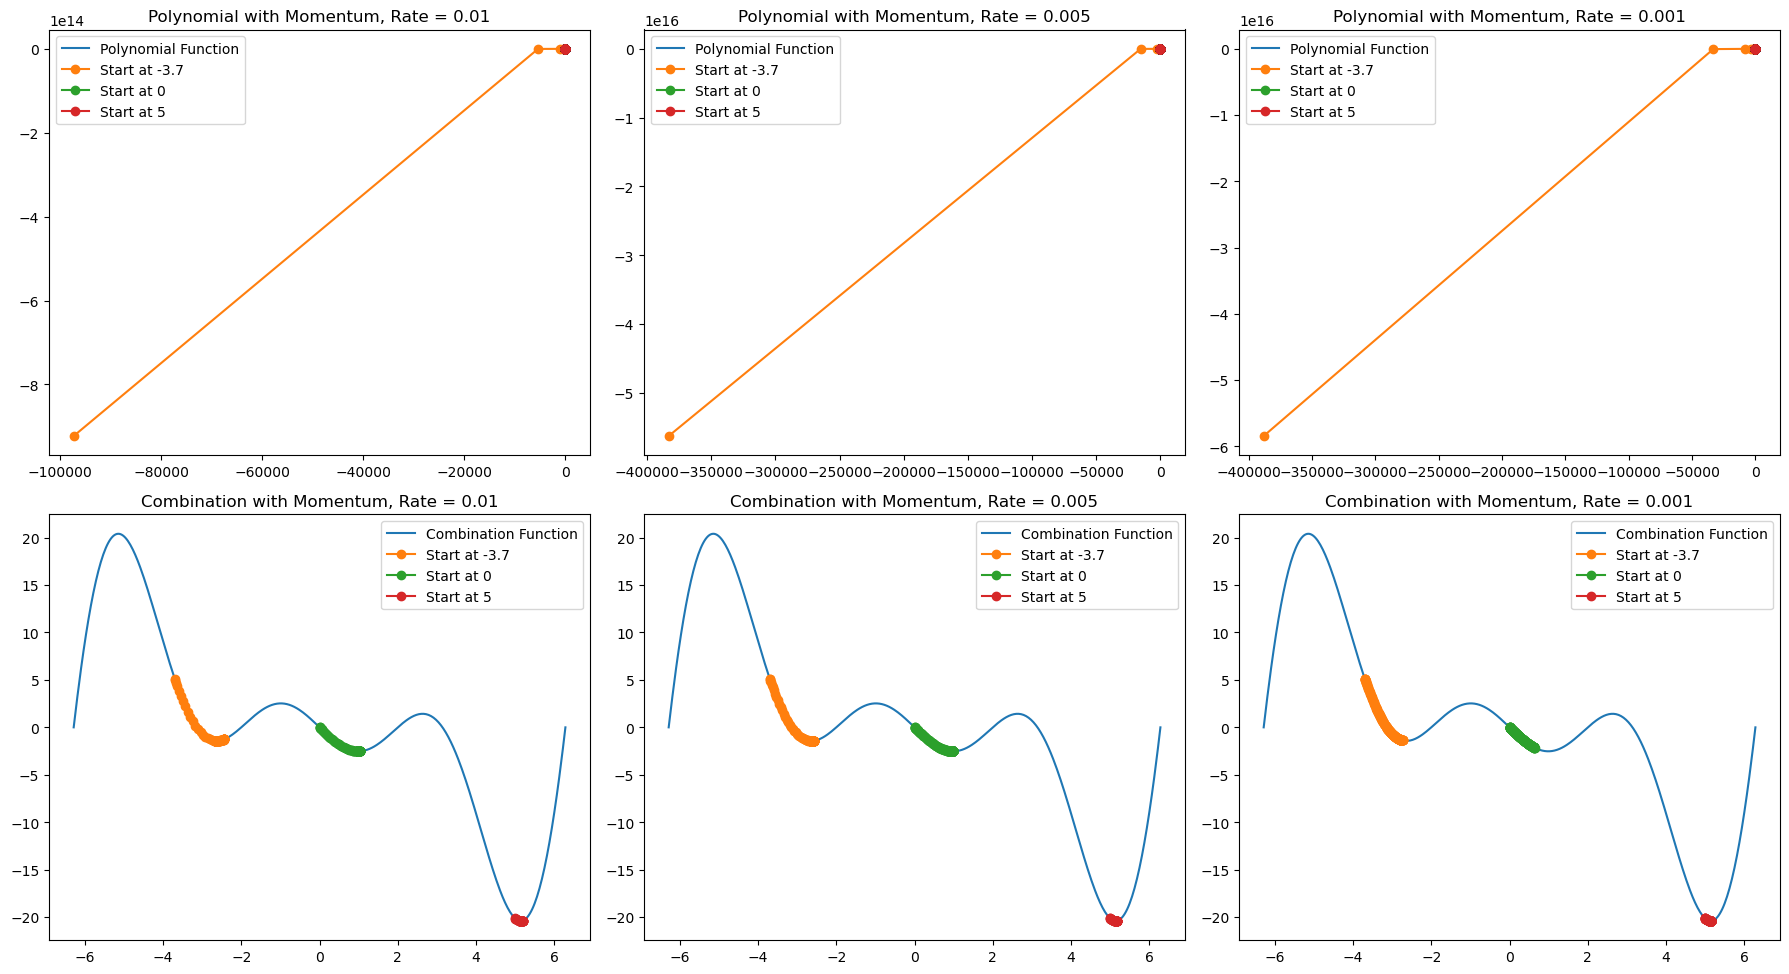

In [8]:
def gradient_descent_with_momentum(derivative_func, initial_x, learning_rate, beta, n_iterations, threshold=1e10):
    x_path = [initial_x]
    velocity = 0  # Initial velocity
    for _ in range(n_iterations):
        current_x = x_path[-1]
        gradient = derivative_func(current_x)
        if abs(gradient) > threshold:
            break
        velocity = beta * velocity + (1 - beta) * gradient  # update velocity with momentum
        next_x = current_x - learning_rate * velocity
        if abs(next_x) > threshold:
            break
        x_path.append(next_x)
    return x_path

# momentum coefficient
beta = 0.9

paths_polynomial_momentum = {gamma: {x0: gradient_descent_with_momentum(derivative_polynomial, x0, gamma, beta, iterations)
                                     for x0 in initial_points} for gamma in learning_rates}
paths_combination_momentum = {gamma: {x0: gradient_descent_with_momentum(derivative_combination, x0, gamma, beta, iterations)
                                      for x0 in initial_points} for gamma in learning_rates}

fig, axs = plt.subplots(2, len(learning_rates), figsize=(18, 10))

for i, gamma in enumerate(learning_rates):
    axs[0, i].plot(x_polynomial, y_polynomial, label=f'Polynomial Function')
    for x0 in initial_points:
        path = paths_polynomial_momentum[gamma][x0]
        axs[0, i].plot(path, f(np.array(path)), marker='o', label=f'Start at {x0}')
    axs[0, i].set_title(f'Polynomial with Momentum, Rate = {gamma}')
    axs[0, i].legend()
    
    axs[1, i].plot(x_combination, y_combination, label='Combination Function')
    for x0 in initial_points:
        path = paths_combination_momentum[gamma][x0]
        axs[1, i].plot(path, k(np.array(path)), marker='o', label=f'Start at {x0}')
    axs[1, i].set_title(f'Combination with Momentum, Rate = {gamma}')
    axs[1, i].legend()

plt.tight_layout()
plt.show()
